In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import time

# 1 Univariate Linear Regression

In [2]:
pathToDataFile = 'ex1data1.txt'

## 1.1 Data Visualisation

In [3]:
dataFrame = pd.read_csv(pathToDataFile, header = None)
sampleSize, numVariables = dataFrame.shape
print ("sampleSize =", sampleSize, "numVariables =", numVariables)
print (dataFrame.head())

sampleSize = 97 numVariables = 2
        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


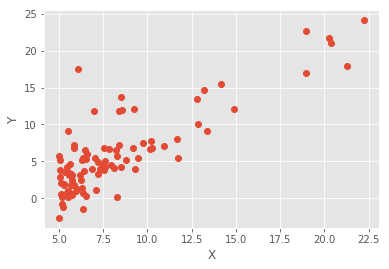

In [4]:
Xs = dataFrame.iloc[:, :1]
Ys = dataFrame.iloc[:, 1:2]
plt.plot(Xs, Ys, 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 1.2 Data Extraction and Transformation

In [5]:
def getData(pathToDataFile):
    data = np.loadtxt(pathToDataFile, delimiter = ',')
    sampleSize, numVariables = data.shape
#     matrix of variables X(n, k), where n is sampleSize, and k is numVariables, including the intercept
    X = np.insert(data[:, :-1], 0, 1, axis=1)
#     vector of response y(n, 1), where n is sampleSize
    y = data[:, -1:]
#     vector of coefficients beta(k, 1), where k is numVariables, including the intercept
    beta = np.zeros((numVariables,1))
    return beta, X, y

In [6]:
beta, X, y = getData(pathToDataFile)

## 1.3 Linear Regression

### 1.3.1 Computing Parameters Analytically
**Coefficient Matrix** can be calculated as follows 
$$\beta = (X^T\cdot X)^{-1}\cdot X^T\cdot y$$

**X** is a matrix of variables with a first column of dummy variables as intercept (column of ones).
**y** is a vector of responses.
$\theta$ is a vector of coefficients in the linear regression model.

In [7]:
# Computing Parameters Analytically
def linearRegression_analytical(X, y):
#     beta vector (2, 1), vector of coefficients
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return beta

### 1.3.2 Computing Parameters Using Gradient Descent & Linear Algebra

#### Vector Representation of the Regression Problem
Variables matrix X:
\begin{equation}
X =
\begin{vmatrix}
x_{1,1} & \ldots & x_{1,j} \\
\ldots & \ldots & \ldots \\
x_{n,1} & \ldots & x_{n,j}\\
\end{vmatrix}
\end{equation}

Variables marix X, after adding a column of ones as intercepts:
\begin{equation}
X =
\begin{vmatrix}
1 & x_{1,1} & \ldots & x_{1,k} \\
1 & \ldots & \ldots & \ldots \\
1 & x_{n,1}& \ldots & x_{n,k}\\
\end{vmatrix}
\end{equation}

Response vector Y:
\begin{equation}
Y =
\begin{vmatrix}
y_1\\
\ldots\\
y_n\\
\end{vmatrix}
\end{equation}

Coefficients vector $\beta$:
\begin{equation}
\beta =
\begin{vmatrix}
\beta_1\\
\ldots\\
\beta_k\\
\end{vmatrix}
\end{equation}

**Hypothesis** $h_{\beta}(X) =  X\cdot\beta$

**Error** $e = (h_{\beta}(X) - y)$

**Cost Function** $J = \frac{1}{2n}{\sum(h_{\beta} - y)^2}$

**Gradient** $\frac{\partial J}{\partial \beta} = \frac{1}{n}X^{T}\cdot e$<br\>

In the code $\frac{\partial J}{\partial \beta}$ is denoted symply as **g**.


In [8]:
def hypothesis(beta, X):
#     return hypothesis vector h(n, 1), where n is sampleSize
    return np.dot(X, beta)

def costFunction(beta, X, y):
    sampleSize, numVariables = X.shape
#     hypothesis vector h(n, 1)
    h = hypothesis(beta, X)
#     cost scalar J(1, 1)
    J = np.sum((y-h)**2)/(2*sampleSize)
#     similarly, cost J can be calculated using dot-product
#     J = np.dot((y-h).T, y-h)/(2*sampleSize)
#     technically, the result is an array (1,1) rather than a float
    return J

def gradientDescent(beta, X, y, alpha, iterations):
    sampleSize, numVariables = X.shape
    J_history = []
    for i in range(iterations):
#         hypothesis vector h(n, 1)
        h = hypothesis(beta, X)
#         error vector e(n, 1)
        e = h - y
#         cost scalar J
        J = costFunction(beta, X, y)
#         gradient vector g(k, 1)
        g = np.dot(X.T, e)/(sampleSize)
#         updated beta vector beta(k, 1)
        beta = beta - alpha*g
#         updated J_history
        J_history += [J] 
    return beta, J_history

## 1.4 Results Visulisation & Analysis

In [9]:
def plotRegression(beta, X, y):  
#     yFit = betaFit[0][0] + betaFit[1][0]*X[:,1:]
    yFit = np.dot(X,betaFit)
    
    MSE = np.sum((y - yFit)**2)/y.shape[0]
    
    plt.plot(X[:,1:], y, 'o', X[:,1:], yFit, '-')
    plt.xlabel("X")
    plt.ylabel("Y")
    print ("β_0:", betaFit[0][0],
           "\nβ_1:", betaFit[1][0],
           "\nRegression: Y =", '{:10.2f}'.format(betaFit[0][0]), '+', '{:10.2f}'.format(betaFit[1][0]), "X"
           "\nMSE =",'{:10.2f}'.format(MSE))
    return plt.show()

def plotConvergence(J_history, iterations):
    plt.plot(np.arange(1, iterations + 1), J_history, '-')
    plt.xlabel("iterations")
    plt.ylabel("J (cost)")
    plt.show()

### 1.4.1 Analytical Approach

β_0: -3.89578087831 
β_1: 1.19303364419 
Regression: Y =      -3.90 +       1.19 X
MSE =       8.95


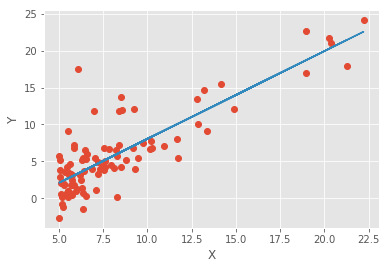

In [10]:
betaFit = linearRegression_analytical(X, y)
plotRegression(betaFit, X, y)

### 1.4.2 Gradient-Descent Approach

β_0: -3.24140214427 
β_1: 1.12729420243 
Regression: Y =      -3.24 +       1.13 X
MSE =       9.03


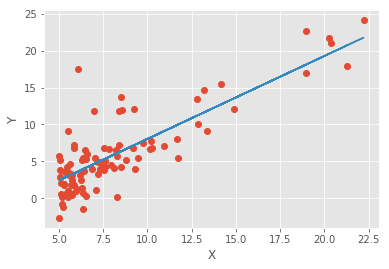

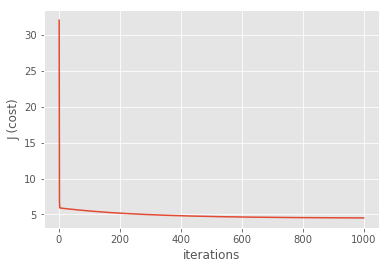

In [11]:
# setting learning rate (alpha)
alpha = 0.01
iterations = 1000

betaFit = gradientDescent(beta, X, y, alpha, iterations)[0]
plotRegression(betaFit, X, y)
costVector = gradientDescent(beta, X, y, alpha, iterations)[1]
plotConvergence(costVector, iterations)

[28.109344103571171, 10.199564153888035, 5.8594285827461574, 5.4412597614266875, 4.5031827487959317, nan]


/Users/nikita/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in square
/Users/nikita/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in subtract


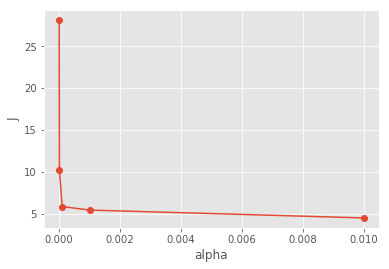

In [12]:
iterations = 1000
J = []
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]:
    beta, J_history = gradientDescent(beta, X, y, alpha, iterations)
    J += [J_history[-1]]
print (J)
plt.plot([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1], J, 'o-')
plt.xlabel("alpha")
plt.ylabel("J")
plt.show()
#     print ('alpha =', str(alpha),'\nJ =', J_history[-1])
#     plotCostFunctionVSiterations(J_history, iterations)

## 1.5 Data Import & Manipulation Using Pandas
https://codereview.stackexchange.com/questions/171144/gradient-descent-for-linear-regression-using-numpy-pandas<br\>
http://anwarruff.com/the-linear-regression-cost-function-in-matrix-form/

### 1.5.1 Data Extraction and Transformation Using Pandas

In [13]:
def pandaData(pathToDataFile):
    dataFrame = pd.read_csv(pathToDataFile, header = None, names = ['x1', 'y'])
    dataFrame.insert(0, 'x0', 1)
    nRows, nColumns = dataFrame.shape
    X = dataFrame[['x0','x1']]
    y = dataFrame[['y']]
    beta = pd.DataFrame(np.zeros(X.shape[1]), columns = ['beta'])
    return beta, X, y

beta_pd, X_pd, y_pd = pandaData(pathToDataFile)

print(X_pd.head())
print(y_pd.head())
print(beta_pd.head())
print('Sample Size:', X_pd.shape[0])

   x0      x1
0   1  6.1101
1   1  5.5277
2   1  8.5186
3   1  7.0032
4   1  5.8598
         y
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
   beta
0   0.0
1   0.0
Sample Size: 97


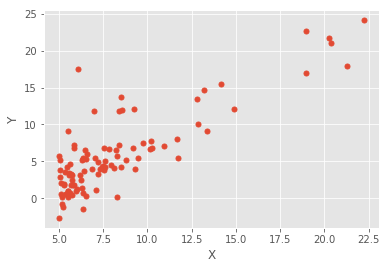

In [14]:
plt.plot(X_pd['x1'], y_pd, 'o', ms = 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
def plotRegression_pd(beta, X, y):
#     yFit = betaFit[0][0] + betaFit[1][0]*X[:,1:]
    yFit = np.dot(X,betaFit)
    MSE = np.sum((y - yFit)**2)/y_pd.shape[0]

    plt.plot(X['x1'], y, 'o', X['x1'], yFit, '-')
    plt.xlabel("X")
    plt.ylabel("Y")
    print ("β_0:", betaFit[0][0],
           "\nβ_1:", betaFit[1][0],
           "\nRegression: Y =", '{:10.2f}'.format(betaFit[0][0]), '+', '{:10.2f}'.format(betaFit[1][0]), "X"
           "\nMSE =", '{:10.2f}'.format(MSE[0])
          )
    return plt.show()

### 1.5.2 Analytical Approach Using Pandas

β_0: -3.24140214427 
β_1: 1.12729420243 
Regression: Y =      -3.24 +       1.13 X
MSE =       9.03


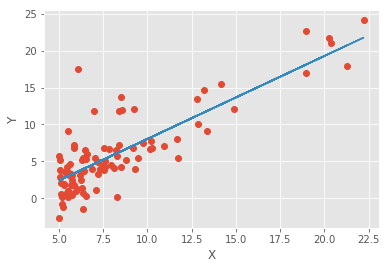

In [16]:
betaFit_pd = linearRegression_analytical(X_pd, y_pd)
plotRegression_pd(betaFit_pd, X_pd, y_pd)

### 1.5.3 Gradient-Descent Approach Using Pandas

β_0: -3.24140214427 
β_1: 1.12729420243 
Regression: Y =      -3.24 +       1.13 X
MSE =       9.03


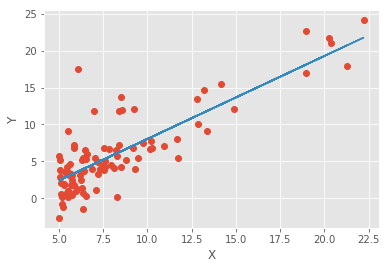

In [17]:
alpha = 0.01
iterations = 1000

betaFit_pd = gradientDescent(beta_pd, X_pd, y_pd, alpha, iterations)
plotRegression_pd(betaFit_pd[0], X_pd, y_pd)
# costVector = gradientDescent(beta, X, y, alpha, iterations)[1]
# plotConvergence(costVector, iterations)

# 2 Multivariate Linear Regression

In [18]:
pathToDataFile = 'ex1data2.txt'

## 2.1 Data Extraction and Transformation

In [19]:
dataFrame = pd.read_csv(pathToDataFile, header = None, names = ['x1', 'x2', 'y'])
dataFrame.insert(0, 'x0', 1)
nRows, nColumns = dataFrame.shape
X = dataFrame[['x0','x1', 'x2']]
y = dataFrame[['y']]
beta_pd = pd.DataFrame(np.zeros(X.shape[1]), columns = ['beta'])

print(dataFrame.head())
print(X.head())
print(y.head())
print(beta_pd.head())
print('Sample Size:', dataFrame.shape[0])

   x0    x1  x2       y
0   1  2104   3  399900
1   1  1600   3  329900
2   1  2400   3  369000
3   1  1416   2  232000
4   1  3000   4  539900
   x0    x1  x2
0   1  2104   3
1   1  1600   3
2   1  2400   3
3   1  1416   2
4   1  3000   4
        y
0  399900
1  329900
2  369000
3  232000
4  539900
   beta
0   0.0
1   0.0
2   0.0
Sample Size: 47
